In [112]:
import numpy as np
import matplotlib.pyplot as plt
dx=.1 
x=np.arange(0,20,dx)
sigma=0.415*np.ones_like(x)
gradx=np.gradient(x)
def tau(i,j):

    s=0
    if i<j:

        s=sigma[i]*gradx[i]+sigma[j]*(gradx[j])
        k=i+1
        while k<j-1:
            s=s+gradx[k]*sigma[k]
            k=k+1
    elif i>j:
        s=sigma[j]*gradx[j]+sigma[i]*gradx[i]

        k=j+1
        while k<i-1:
            s=s+gradx[k]*sigma[k]
            k=k+1

    elif i==j:

            s=sigma[i]*(gradx[i])

    return s 

meu=np.arange(0.0001,1,dx)
dx=0.0001
def E(x):
    f=meu*np.exp(-x/meu)
    val=np.trapz(f,meu,dx=dx)
    return val
matrix=np.zeros((len(x),len(x)))

for i in range(len(x)):
    val=0
    
    for j in range(len(x)):
        if i!=j:
            val=(E(tau(i,j))-E((tau(i,j)+tau(i,i)))-E((tau(i,j)+tau(j,j)))+E((tau(i,j)+tau(i,i)+tau(j,j))))/(2*sigma[i]*gradx[i])          

        if i==j:

            val=(sigma[i]*gradx[i])*((1-(1-2*E(tau(i,i))))/(2*sigma[i]*gradx[i]))

        matrix[i][j]=val


In [113]:
sigma_s=0.0334
neu_sigma_f=0.178
sigma_t=sigma

In [114]:
m,n=np.shape(matrix)
sigma_s=np.eye(m)*sigma_s
neu_sigma_f=np.eye(m)*0.178



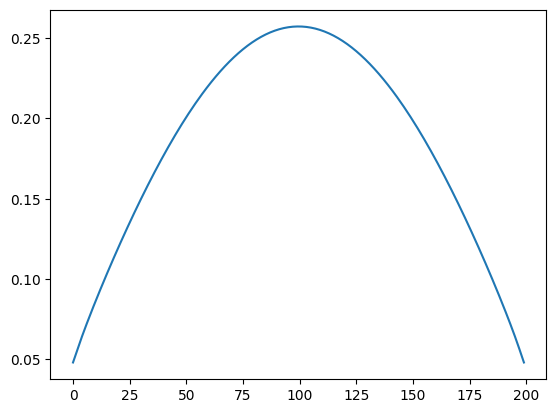

In [115]:
phi0=np.ones((m,1))
k0=1
k=[]
for i in range(1000):
    phi1=np.matmul(matrix,np.matmul(sigma_s,phi0)+np.matmul(neu_sigma_f,phi0)*0.96/k0)
    k0=k0*np.sum(np.matmul(neu_sigma_f,phi1))/np.sum(np.matmul(neu_sigma_f,phi0))
    phi0=phi1.copy()
    k.append(k0)

plt.plot(phi1)

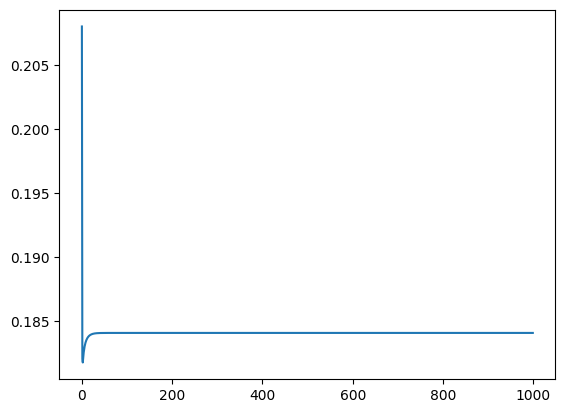

In [116]:
plt.plot(k)